In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [9]:
df=pd.read_csv("students_placement.csv")

In [11]:
df

,cgpa,iq,profile_score,placed
0,5.97,106,61,0
1,6.83,113,77,0
2,6.60,110,61,0
3,5.54,113,68,0
4,6.84,102,67,0
...,...,...,...,...
295,6.44,107,54,0
296,6.09,108,52,0
297,7.68,101,70,1
298,7.00,90,28,1


In [13]:
x=df.drop(columns=['placed'])


In [15]:
x

,cgpa,iq,profile_score
0,5.97,106,61
1,6.83,113,77
2,6.60,110,61
3,5.54,113,68
4,6.84,102,67
...,...,...,...
295,6.44,107,54
296,6.09,108,52
297,7.68,101,70
298,7.00,90,28


In [17]:
y=df['placed']

In [19]:
from sklearn.model_selection import train_test_split



In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
from sklearn.svm import SVC
model = SVC()

In [27]:
model.fit(x_train,y_train)

SVC()

In [31]:
model.score(x_test,y_test)

0.9333333333333333

In [35]:
import pickle
pickle.dump(model,open("model.pkl",'wb'))

In [379]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [307]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix

In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import linear_model


In [311]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
reg=linear_model.LinearRegression()

In [313]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [315]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    
    
    return accuracy


In [317]:
train_classifier(abc,x_train,y_train,x_test,y_test)

0.9

In [318]:
accuracy_scores = []

for name,clf in clfs.items():
    
    current_accuracy = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    
    
    accuracy_scores.append(current_accuracy)
    

For  SVC
Accuracy -  0.5
For  KN
Accuracy -  0.9
For  NB
Accuracy -  0.7666666666666667
For  DT
Accuracy -  0.8333333333333334
For  LR
Accuracy -  0.8833333333333333


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


For  RF
Accuracy -  0.85
For  AdaBoost
Accuracy -  0.9
For  BgC
Accuracy -  0.8666666666666667
For  ETC
Accuracy -  0.9
For  GBDT
Accuracy -  0.85
For  xgb
Accuracy -  0.8666666666666667


In [320]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores}).sort_values('Accuracy',ascending=False)

In [321]:
performance_df

,Algorithm,Accuracy
1,KN,0.900000
6,AdaBoost,0.900000
8,ETC,0.900000
4,LR,0.883333
7,BgC,0.866667
10,xgb,0.866667
5,RF,0.850000
9,GBDT,0.850000
3,DT,0.833333
2,NB,0.766667


In [322]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [323]:
performance_df1 

,Algorithm,variable,value
0,KN,Accuracy,0.900000
1,AdaBoost,Accuracy,0.900000
2,ETC,Accuracy,0.900000
3,LR,Accuracy,0.883333
4,BgC,Accuracy,0.866667
5,xgb,Accuracy,0.866667
6,RF,Accuracy,0.850000
7,GBDT,Accuracy,0.850000
8,DT,Accuracy,0.833333
9,NB,Accuracy,0.766667


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


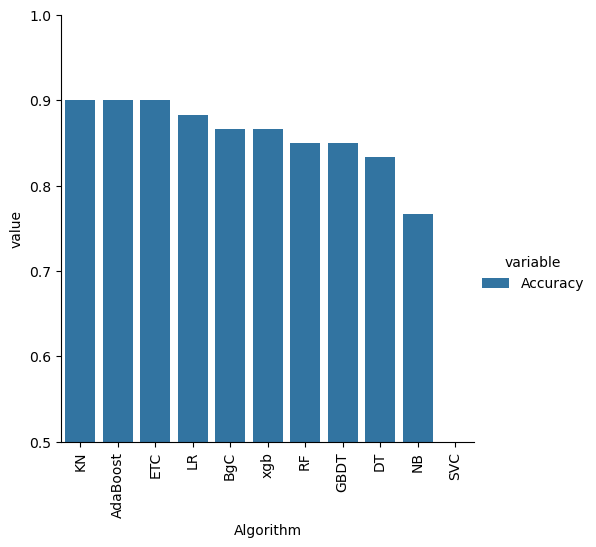

In [324]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [326]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max':accuracy_scores}).sort_values('Accuracy_max',ascending=False)

In [331]:
temp_df

,Algorithm,Accuracy_max
1,KN,0.900000
6,AdaBoost,0.900000
8,ETC,0.900000
4,LR,0.883333
7,BgC,0.866667
10,xgb,0.866667
5,RF,0.850000
9,GBDT,0.850000
3,DT,0.833333
2,NB,0.766667


In [332]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,}).sort_values('Accuracy_scaling',ascending=False)

In [333]:
temp_df

,Algorithm,Accuracy_scaling
1,KN,0.900000
6,AdaBoost,0.900000
8,ETC,0.900000
4,LR,0.883333
7,BgC,0.866667
10,xgb,0.866667
5,RF,0.850000
9,GBDT,0.850000
3,DT,0.833333
2,NB,0.766667


In [334]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [336]:
knc = KNeighborsClassifier()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('KN',knc), ('ETC', etc), ('GBDT',gbdt )],voting='soft')

In [338]:

voting.fit(x_train,y_train)

VotingClassifier(estimators=[('KN', KNeighborsClassifier()),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('GBDT',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=2))],
                 voting='soft')

In [344]:
voting.fit(x_train, y_train)  # Train the model first
y_pred = voting.predict(x_test)  # Now make predictions
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9


In [347]:
knc.fit(x_train, y_train)  
y_pred = knc.predict([[8.5, 107, 80]])  
print(y_pred)


[0]


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [349]:
import pickle
pickle.dump(knc,open('model.pkl','wb'))